In [1]:
import sklearn
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

def loadCrashData():
  data = pd.read_csv("Full_Crash.csv")
  return data

data = loadCrashData()

# Data Loading:
This is where we load our data and begin our data preprocessing step. This includes analyzing our data set for null value and performing feature engineering to add features that may prove to be imiportant to our model. We subset our model from 1,000,000 rows to 85,000 in order to run our model and system with the RAM that Colab Pro provides.



In [2]:
data = data.sample(n=85000)

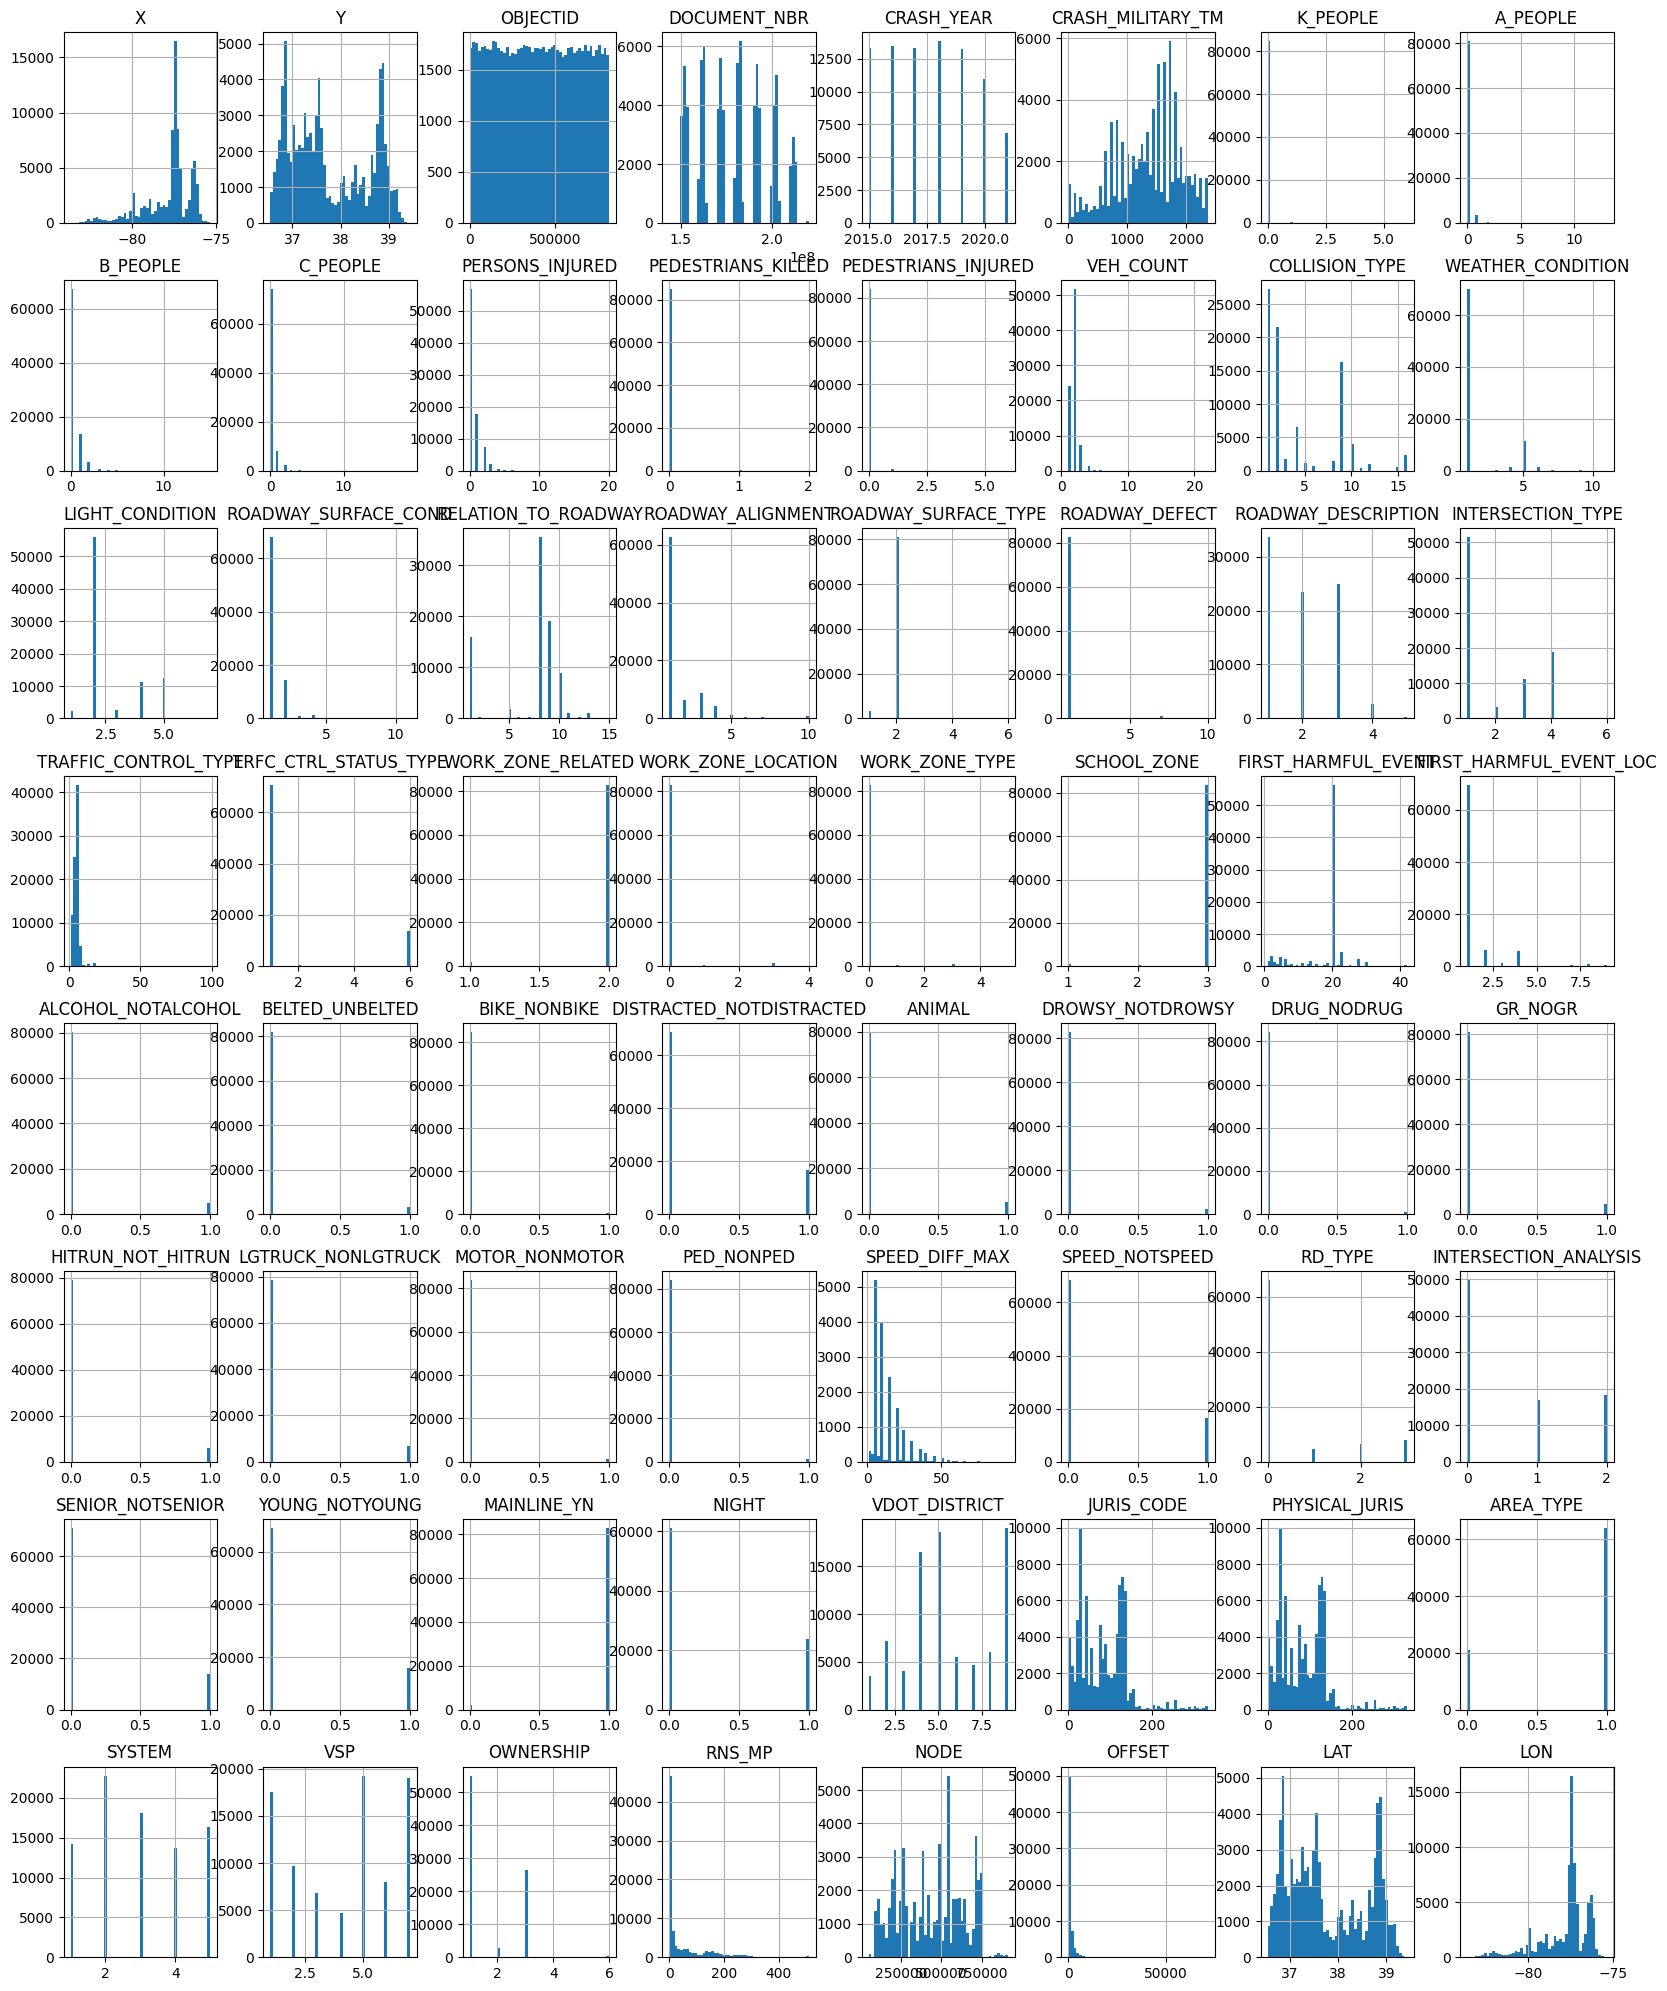

In [3]:
%matplotlib inline
data.hist(bins=50, figsize=(20,25))
plt.show()

In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85000 entries, 374582 to 550983
Data columns (total 73 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X                         84999 non-null  float64
 1   Y                         84999 non-null  float64
 2   OBJECTID                  85000 non-null  int64  
 3   DOCUMENT_NBR              85000 non-null  int64  
 4   LOCAL_CASE_CD             84690 non-null  object 
 5   CRASH_YEAR                85000 non-null  int64  
 6   CRASH_DT                  85000 non-null  object 
 7   CRASH_MILITARY_TM         85000 non-null  int64  
 8   CRASH_SEVERITY            85000 non-null  object 
 9   K_PEOPLE                  85000 non-null  int64  
 10  A_PEOPLE                  85000 non-null  int64  
 11  B_PEOPLE                  85000 non-null  int64  
 12  C_PEOPLE                  85000 non-null  int64  
 13  PERSONS_INJURED           85000 non-null  int64  
 14  

<Axes: xlabel='LON', ylabel='LAT'>

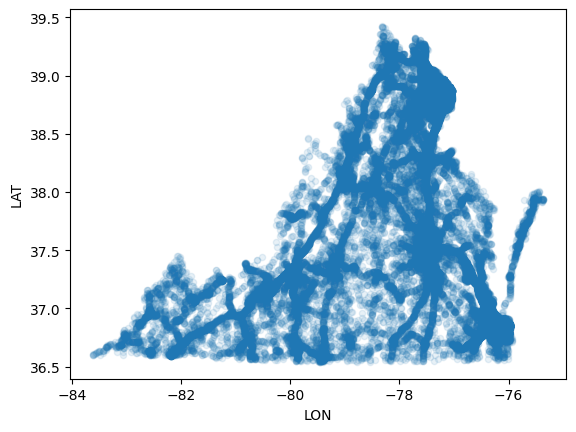

In [5]:
data.plot(kind="scatter", x = "LON", y="LAT", alpha=0.1)

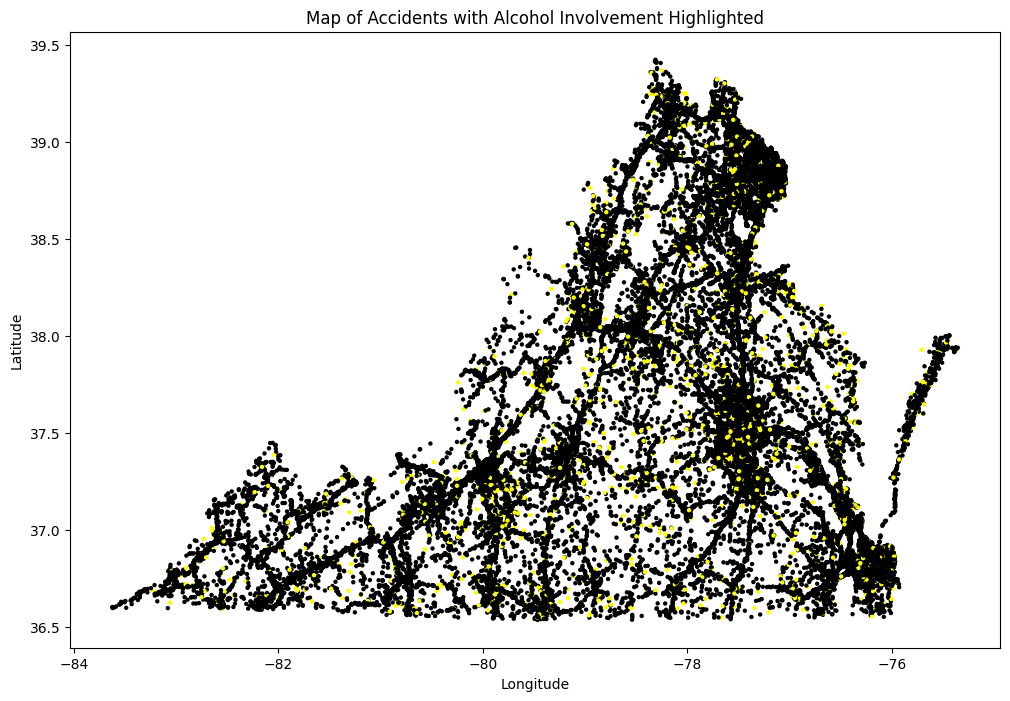

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains 'ALCOHOL_NOTALCOHOL' column.
# You'll want to define a color based on the 'ALCOHOL_NOTALCOHOL' value.

# Define a color for the points where alcohol was involved (e.g., value > 0)
data['color'] = data['ALCOHOL_NOTALCOHOL'].apply(lambda x: 'yellow' if x > 0 else 'black')

jitter_magnitude = 0.01
data['LON_jittered'] = data['LON'] + (np.random.rand(len(data)) - 0.5) * jitter_magnitude
data['LAT_jittered'] = data['LAT'] + (np.random.rand(len(data)) - 0.5) * jitter_magnitude

# Now plot using the colors defined, with a smaller point size
plt.figure(figsize=(12, 8))
plt.scatter(data['LON_jittered'], data['LAT_jittered'], c=data['color'], s=10, edgecolor='none')  # Adjusted point size with 's'
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Accidents with Alcohol Involvement Highlighted')
plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assume 'data' is your DataFrame with 'LON' and 'LAT' columns for longitude and latitude.
# # Set the size of the figure
# plt.figure(figsize=(10, 8))

# # Create the KDE plot
# sns.kdeplot(x=data['LON'], y=data['LAT'], fill=True, thresh=0, levels=100, cmap="viridis")

# # Set labels and title
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Heatmap of Crash Density in Virginia')

# # Optionally, you can set the aspect of the map to be equal, to prevent distortion:
# plt.gca().set_aspect('equal', adjustable='box')

# plt.show()

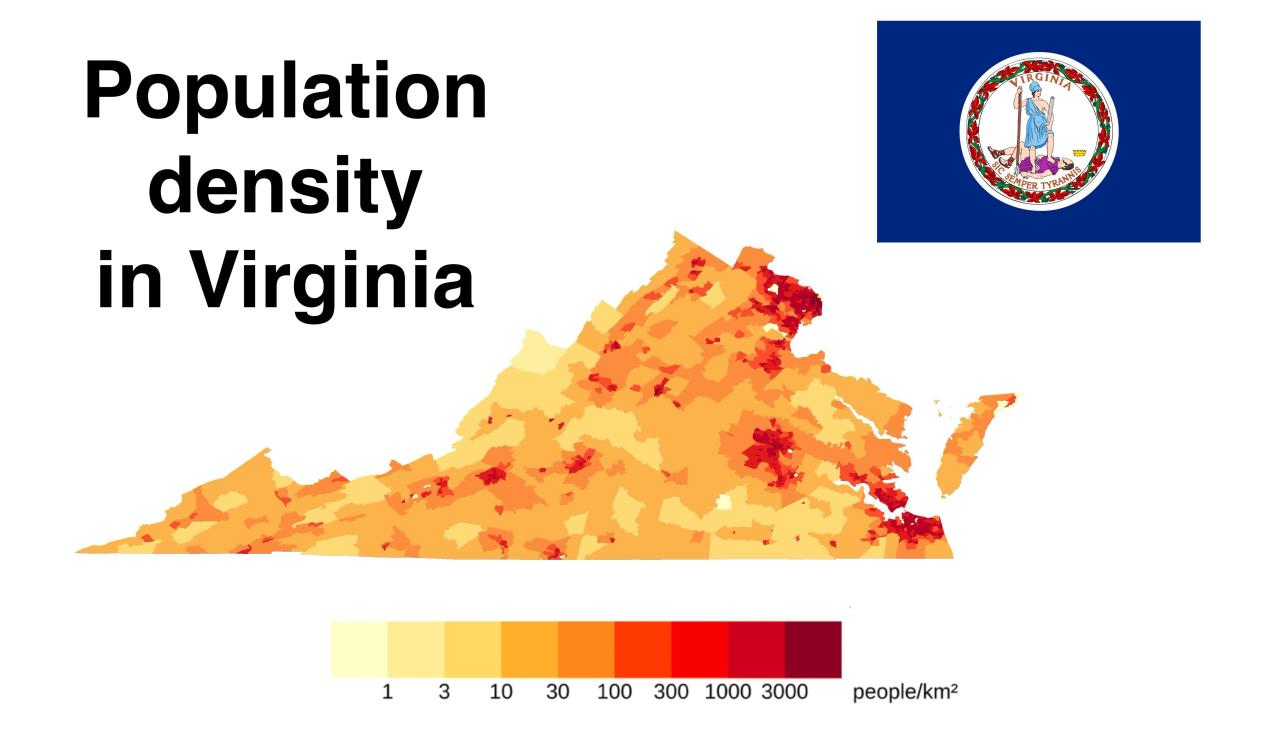

In [7]:
missing_values_total = data.isnull().sum().sort_values(ascending=False)
missing_values_percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_values = pd.concat([missing_values_total, missing_values_percent], axis=1, keys=["Total", "Percent"])
print("Missing Values:")
missing_values.head(20)

Missing Values:


,Total,Percent
SPEED_DIFF_MAX,68374,80.440000
OFFSET,22352,26.296471
NODE,22352,26.296471
MPO_NAME,18220,21.435294
FAC,6459,7.598824
FUN,2192,2.578824
LOCAL_CASE_CD,310,0.364706
RNS_MP,258,0.303529
X,1,0.001176
Y,1,0.001176


In [8]:
data = data.drop((missing_values[missing_values['Total'] > 9000]).index,1)

<ipython-input-8-045ea37af08f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop((missing_values[missing_values['Total'] > 9000]).index,1)


In [9]:
# Drop milepoint along route which is used to find location b/c already have lat/lon
data = data.drop("RNS_MP", axis = 1)
# Drop number for police report
data = data.drop("LOCAL_CASE_CD",axis=1)
# Drop X & Y because samea s LAT and LON
data = data.drop("X", axis=1)
data = data.drop("Y", axis=1)
data = data.drop("CRASH_YEAR", axis = 1)
data = data.drop("CRASH_DT", axis = 1)

# Drop 2 instances where lat and lon not filled in
data.dropna(subset=['LAT'], inplace=True)
data.shape

(84999, 66)

In [10]:
#removing the last two digits of military time (the minutes)
data["mod_CRASH_MILITARY_TM"] = data["CRASH_MILITARY_TM"]//100
data = data.drop("CRASH_MILITARY_TM", axis = 1)

In [11]:
data["mod_CRASH_MILITARY_TM"]
#can talk about that accidents are happening coming back from work in the evening.

374582    12
472375    16
773522    13
294855    22
619622    12
          ..
18820     21
584384    11
78847      3
238799     7
550983    11
Name: mod_CRASH_MILITARY_TM, Length: 84999, dtype: int64

In [12]:
data = data.drop("OBJECTID", axis=1)
# Data w/ bad spread - most values in one category
data = data.drop("DOCUMENT_NBR", axis=1)
data = data.drop("K_PEOPLE", axis=1)
data = data.drop("C_PEOPLE", axis=1)
data = data.drop("A_PEOPLE", axis=1)
data = data.drop("B_PEOPLE", axis=1)
data = data.drop("PEDESTRIANS_KILLED", axis=1)
data = data.drop("PEDESTRIANS_INJURED", axis=1)
data = data.drop("ROADWAY_SURFACE_TYPE", axis=1)
data = data.drop("ROADWAY_DEFECT", axis=1)
data = data.drop("WORK_ZONE_LOCATION", axis=1)
data = data.drop("WORK_ZONE_TYPE", axis=1)
data = data.drop("ROUTE_OR_STREET_NM", axis=1)
data = data.drop("DRUG_NODRUG", axis=1)
data = data.drop("RD_TYPE", axis=1)
data = data.drop("PHYSICAL_JURIS", axis=1)
data = data.drop("LON_jittered", axis = 1)
data = data.drop("LAT_jittered", axis = 1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84999 entries, 374582 to 550983
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_SEVERITY            84999 non-null  object 
 1   PERSONS_INJURED           84999 non-null  int64  
 2   VEH_COUNT                 84999 non-null  int64  
 3   COLLISION_TYPE            84999 non-null  int64  
 4   WEATHER_CONDITION         84999 non-null  int64  
 5   LIGHT_CONDITION           84999 non-null  int64  
 6   ROADWAY_SURFACE_COND      84999 non-null  int64  
 7   RELATION_TO_ROADWAY       84999 non-null  int64  
 8   ROADWAY_ALIGNMENT         84999 non-null  int64  
 9   ROADWAY_DESCRIPTION       84999 non-null  int64  
 10  INTERSECTION_TYPE         84999 non-null  int64  
 11  TRAFFIC_CONTROL_TYPE      84999 non-null  int64  
 12  TRFC_CTRL_STATUS_TYPE     84999 non-null  int64  
 13  WORK_ZONE_RELATED         84999 non-null  int64  
 14  

# Pipeline Step:
We split our model into training and testing set here, and transform the x_train through fit_transform, which leverages our pipeline. We use a OneHotEncoder instead of Ordinal Encoder since there is no "rankning" in values of the column, and we use median for the numerical columns that have empty values.

In [14]:
# # Split both and drop certain features from X and copy to y
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_set.drop("CRASH_SEVERITY", axis=1)
y_train = train_set["CRASH_SEVERITY"].copy()

X_test = test_set.drop("CRASH_SEVERITY", axis=1);
y_test = test_set["CRASH_SEVERITY"].copy()

In [15]:
num_attribs = X_train.select_dtypes(include=[np.number]).columns
cat_attribs = X_train.select_dtypes(exclude=[np.number]).columns

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

# Assuming num_attribs and cat_attribs are defined as lists of column names

# Create categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

# Create numerical pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# Combine both pipelines into a full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

# Applying the pipeline to training and testing data
X_train_prep = full_pipeline.fit_transform(X_train)
X_test_prep = full_pipeline.transform(X_test)

In [17]:
# Optionally, convert to DataFrame and check the shape
X_train_prep_df = pd.DataFrame(X_train_prep)
print(X_train_prep_df.shape)

(67999, 13894)


In [18]:
print(X_train.shape)
print(X_train_prep.shape)

(67999, 47)
(67999, 13894)


# Our Model!
Below is our FCNN that leverages ReLU activation function and softmax for the output layer to get a probability distribution at the end of our network. We use the keras-tuner in order to optimize our model, but found similar results. Nonetheless, a keras-tuner is an effective way to build an optimal neural network that will output the best results via random search.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import regularizers
# from keras.callbacks import EarlyStopping

# Encode CRASH_SEVERITY
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# Convert to dummy variables (one-hot encoding)
dummy_y_train = to_categorical(encoded_Y)
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)


# Define the model
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train_prep.shape[1],)))
# model.add(Dropout(0.5))
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model1.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.3))
model1.add(Dense(5, activation='softmax'))  # 5 neurons for 5 severity levels

myOptimizer = Adam(learning_rate=0.0001)

# Compile the model
model1.compile(optimizer=myOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X_train_prep, dummy_y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1700/1700 [==============================] - 15s 6ms/step - loss: 1.1714 - accuracy: 0.8029 - val_loss: 0.5872 - val_accuracy: 0.8638
Epoch 2/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.4673 - accuracy: 0.8693 - val_loss: 0.4205 - val_accuracy: 0.8646
Epoch 3/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.3832 - accuracy: 0.8723 - val_loss: 0.3814 - val_accuracy: 0.8685
Epoch 4/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.3548 - accuracy: 0.8748 - val_loss: 0.3615 - val_accuracy: 0.8707
Epoch 5/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.3389 - accuracy: 0.8776 - val_loss: 0.3513 - val_accuracy: 0.8733
Epoch 6/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.3278 - accuracy: 0.8805 - val_loss: 0.3433 - val_accuracy: 0.8749
Epoch 7/15
1700/1700 [==============================] - 8s 4ms/step - loss: 0.3191 - accuracy: 0.8848 - val_loss: 0.3375 - val_accuracy

In [21]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


In [22]:
#Step 1: Define the Model Builder Function
from keras_tuner import HyperModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from kerastuner.tuners import RandomSearch

class MyHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_layer1', min_value=64, max_value=256, step=64),
                        activation='relu',
                        input_shape=self.input_shape))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
        model.add(Dense(units=hp.Int('units_layer2', min_value=32, max_value=128, step=32),
                        activation='relu',
                        kernel_regularizer=regularizers.l2(hp.Float('l2_layer2', min_value=0.001, max_value=0.01, default=0.01))))
        model.add(Dense(units=self.num_classes, activation='softmax'))

        lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model


<ipython-input-22-ce8b078a6109>:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [23]:
#Step 2: Initialize the Tuner and Start the Search
num_classes = 5  # Assuming 5 classes as in your original model
hypermodel = MyHyperModel(input_shape=(X_train_prep.shape[1],), num_classes=num_classes)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_demo')

tuner.search(X_train_prep, dummy_y_train, epochs=15, validation_split=0.2)

Trial 10 Complete [00h 04m 12s]
val_accuracy: 0.8790808916091919

Best val_accuracy So Far: 0.8814705908298492
Total elapsed time: 00h 41m 35s


In [24]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model2 = hypermodel.build(best_hps)

# Fit the model
model2.fit(X_train_prep, dummy_y_train, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
1700/1700 [==============================] - 11s 6ms/step - loss: 0.3929 - accuracy: 0.8578 - val_loss: 0.3184 - val_accuracy: 0.8762
Epoch 2/15
1700/1700 [==============================] - 8s 5ms/step - loss: 0.2976 - accuracy: 0.8816 - val_loss: 0.3063 - val_accuracy: 0.8806
Epoch 3/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.2815 - accuracy: 0.8894 - val_loss: 0.3021 - val_accuracy: 0.8786
Epoch 4/15
1700/1700 [==============================] - 8s 4ms/step - loss: 0.2657 - accuracy: 0.8982 - val_loss: 0.3022 - val_accuracy: 0.8804
Epoch 5/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.2506 - accuracy: 0.9038 - val_loss: 0.3054 - val_accuracy: 0.8776
Epoch 6/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.2348 - accuracy: 0.9120 - val_loss: 0.3175 - val_accuracy: 0.8745
Epoch 7/15
1700/1700 [==============================] - 7s 4ms/step - loss: 0.2226 - accuracy: 0.9170 - val_loss: 0.3243 - val_accuracy

In [25]:
# make. y test into dataframe
X_test = pd.DataFrame(X_test)
print(X_train_prep)

[[-0.57728945  0.22240399 -0.83392143 ...  0.          1.
   0.        ]
 [-0.57728945  1.68968341 -0.83392143 ...  0.          1.
   0.        ]
 [-0.57728945  0.22240399 -0.58624259 ...  0.          1.
   0.        ]
 ...
 [-0.57728945  0.22240399 -0.83392143 ...  0.          1.
   0.        ]
 [-0.57728945 -1.24487543  1.14750931 ...  0.          1.
   0.        ]
 [-0.57728945 -1.24487543  1.14750931 ...  0.          1.
   0.        ]]


In [26]:
# Create a confusion matrix
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score

y_pred_labels1 = model1.predict(X_test_prep)
y_pred_labels1 = np.argmax(y_pred_labels1, axis=1)
y_test_encoded = encoder.transform(y_test)
confusion_mtrx1 = confusion_matrix(y_test_encoded, y_pred_labels1)

532/532 [==============================] - 1s 2ms/step


In [27]:
y_pred_labels2 = model2.predict(X_test_prep)
y_pred_labels2 = np.argmax(y_pred_labels2, axis=1)
confusion_mtrx2 = confusion_matrix(y_test_encoded, y_pred_labels2)

532/532 [==============================] - 1s 2ms/step


# Results

Below is our results of the model. We assess the model through Confusion matrix, precision, accuracy, F1, and AUC!

In [28]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print("Label Mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

Label Mapping:
A: 0
B: 1
C: 2
K: 3
O: 4


In [29]:
print("Accuracy1: ", accuracy_score(y_test_encoded, y_pred_labels1))
print("Precision1: ", precision_score(y_test_encoded, y_pred_labels1, average='weighted'))
print(confusion_mtrx1)

Accuracy1:  0.8831176470588236
Precision1:  0.8764701262781889
[[  126   604    85     0     0]
 [  114  2990   214     0     0]
 [   17   859   539     0     0]
 [   16    23     0    10    55]
 [    0     0     0     0 11348]]


In [30]:

# print(classification_report(y_test_encoded, y_pred_labels))

print("Accuracy2: ", accuracy_score(y_test_encoded, y_pred_labels2))
print("Precision2: ", precision_score(y_test_encoded, y_pred_labels2, average='weighted'))
print(confusion_mtrx2)

Accuracy2:  0.873
Precision2:  0.8666446550760126
[[  148   522   145     0     0]
 [  175  2506   637     0     0]
 [   38   543   834     0     0]
 [   12    26     1    28    37]
 [    0     0     0    23 11325]]


In [33]:
#printing results f1 and AUC
#F1 Score
from sklearn.metrics import f1_score

print("F1 Score model 1: ", f1_score(y_test_encoded, y_pred_labels1, average='weighted'))
print("F1 Score model 2: ", f1_score(y_test_encoded, y_pred_labels2, average='weighted'))
#AUC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_binarized = label_binarize(y_test_encoded, classes = np.unique(y_test_encoded))

y_pred_probs1 = model1.predict(X_test_prep)
y_pred_probs2 = model2.predict(X_test_prep)

print("AUC Score model 1: ", roc_auc_score(y_test_binarized, y_pred_probs1, multi_class='ovr'))
print("AUC Score model 2: ", roc_auc_score(y_test_binarized, y_pred_probs2, multi_class='ovr'))

F1 Score model 1:  0.8676693091449379
F1 Score model 2:  0.8671755043965469
532/532 [==============================] - 1s 2ms/step
AUC Score model 1:  0.9409064658136268
AUC Score model 2:  0.9369503708803768


# Random Forest for Feature Importance

The random forest model we leveraged helped us find the features that impact the 5 classes the most.

In [40]:
# Random Forest feature importance

from sklearn.ensemble import RandomForestClassifier

# Assume X_train and y_train are your training data and labels
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_prep, y_train)

importances = rf.feature_importances_


In [41]:
# If you have a list of feature names available:
feature_names = X_train.columns

# Combine importances with feature names
feature_importances = zip(feature_names, importances)
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for feature in sorted_feature_importances:
    print(f"{feature[0]}: {feature[1]}")

PERSONS_INJURED: 0.31112189933061984
OWNERSHIP: 0.04796413770180993
VSP: 0.04703906730040398
PLAN_DISTRICT: 0.03729867468840382
JURIS_CODE: 0.025422078063677665
COLLISION_TYPE: 0.02300870726556137
RELATION_TO_ROADWAY: 0.018345105286787067
TRAFFIC_CONTROL_TYPE: 0.016369114693894345
FIRST_HARMFUL_EVENT: 0.016063744929659937
ROADWAY_DESCRIPTION: 0.01467825764913123
VEH_COUNT: 0.014360255722006027
ROADWAY_ALIGNMENT: 0.014174973165489761
INTERSECTION_TYPE: 0.0126148638892387
LIGHT_CONDITION: 0.012368086722358432
FAC: 0.009909290638799249
BELTED_UNBELTED: 0.009904600634413372
INTERSECTION_ANALYSIS: 0.008924634184864695
YOUNG_NOTYOUNG: 0.0088412380859596
DISTRACTED_NOTDISTRACTED: 0.008809862406572114
ROADWAY_SURFACE_COND: 0.008784836433636182
VDOT_DISTRICT: 0.00864012501220309
FIRST_HARMFUL_EVENT_LOC: 0.008571597793188949
SENIOR_NOTSENIOR: 0.008499358493039455
AREA_TYPE: 0.008294280336218793
WEATHER_CONDITION: 0.008204716864719692
SPEED_NOTSPEED: 0.00795684353940904
MOTOR_NONMOTOR: 0.00721107

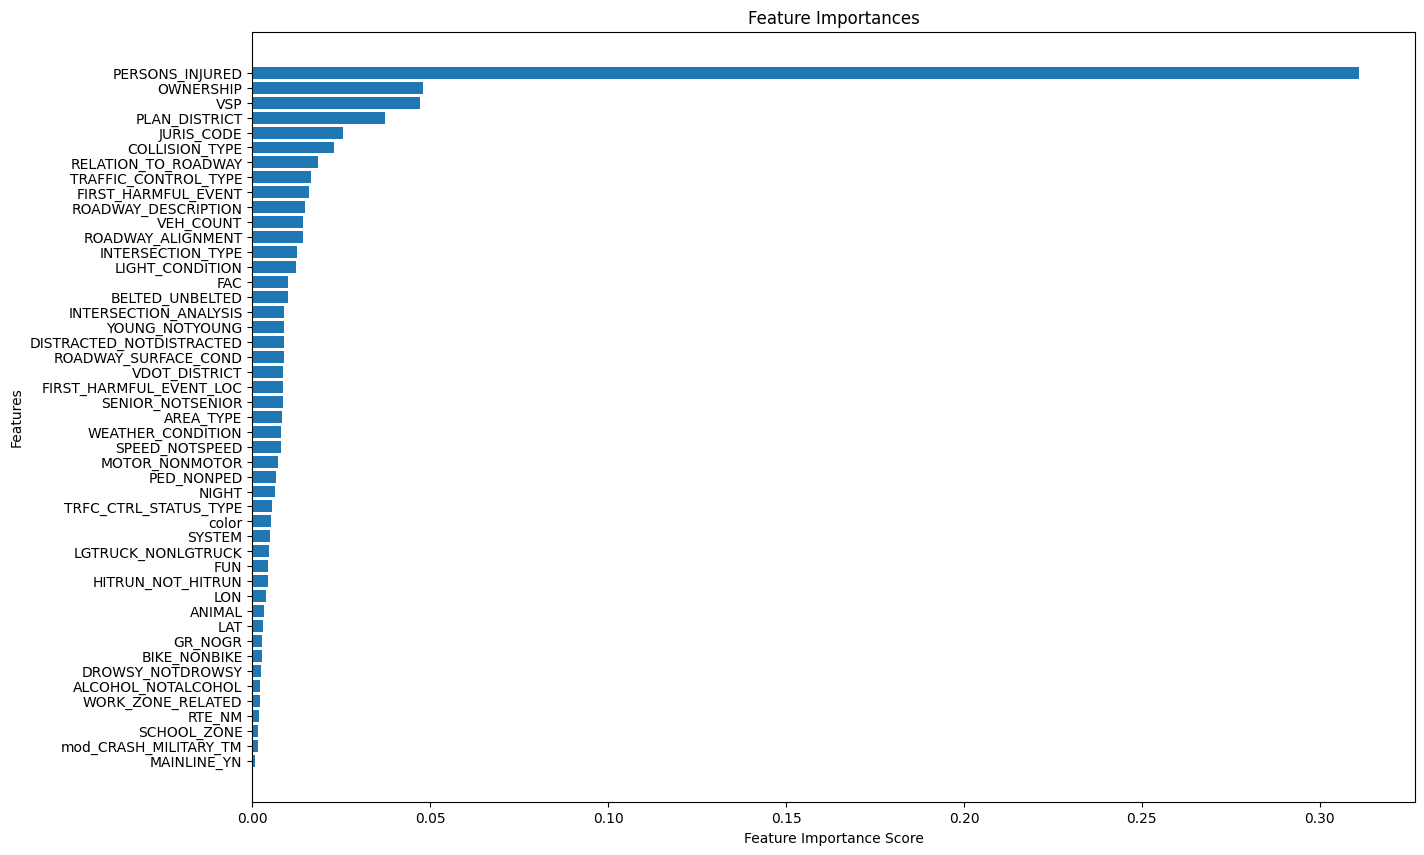

In [42]:
import matplotlib.pyplot as plt

# Extract feature names and their importance scores
features, scores = zip(*sorted_feature_importances)

# Create a bar chart
plt.figure(figsize=(15, 10))
plt.barh(features, scores)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Heat Map
Displays which areas are most prone to accidents. We see richmond, va beach, and washington dc area most prone to accidents.

In [34]:
import folium
from folium.plugins import HeatMap

map_center = [data['LAT'].mean() , data['LON'].mean()]
m = folium.Map(location = map_center, zoom_center = 7)

#add heatmap
heat_data = [[row['LAT'], row['LON']] for index, row in data.iterrows()]

HeatMap(heat_data, radius = 10, max_zoom = 13).add_to(m)

#display map
m

# Shap Values

Below is our shap values that tells us what features are important for each class. Furthermore, we are currently getting an error here with the Shap values but that is because it wants to save it as a .html file and that the TensorFlow and the Shap libraires are different versions, which is causing the error. However, the plot we are still getting is still effective.

In [36]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.5 MB/s eta 0:00:00


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


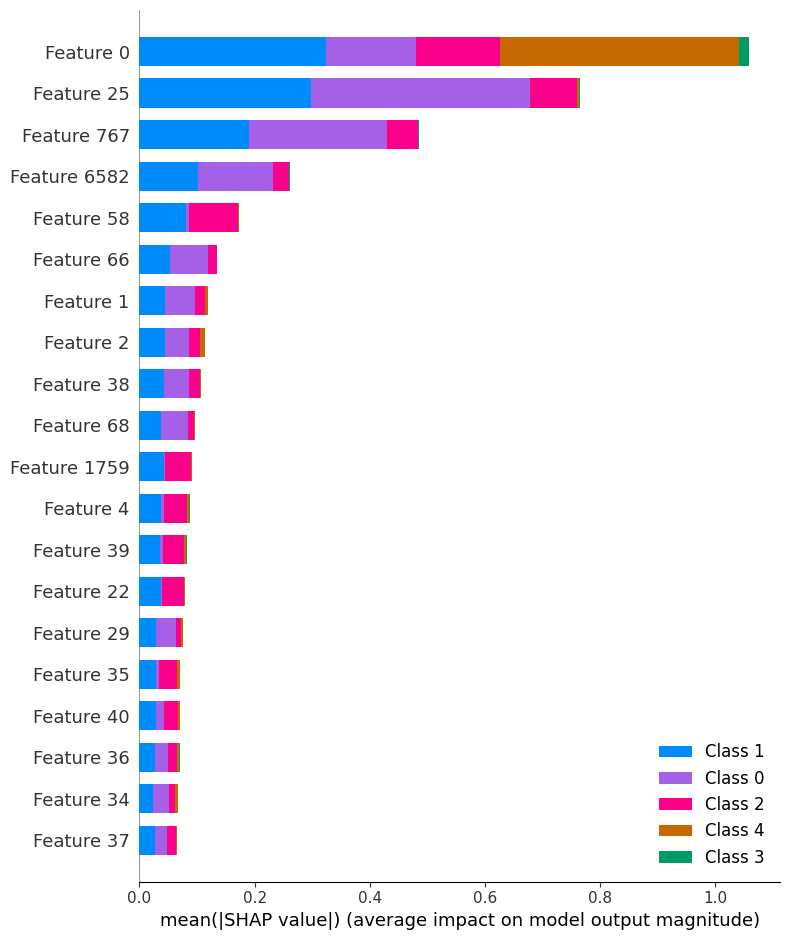

TypeError: ignored

In [37]:
#Furthermore, we are currently getting an error here
#with the Shap values but that is because it wants to save it as a .html file
#and that the TensorFlow and the Shap libraires are different versions, which is causing the error.
#However, the plot we are still getting is still effective.
import shap

X_train_sample = shap.sample(X_train_prep, 100)
explainer = shap.DeepExplainer(model2, X_train_sample)

X_test_sample = shap.sample(X_test_prep, 100)
shap_values = explainer.shap_values(X_test_sample)

# # Calculate SHAP values for the test set

shap.summary_plot(shap_values, X_test_sample)

# For example, for the first instance in the test set sample
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_sample[0])

In [39]:
import numpy as np

# Assuming shap_values is a list of arrays, one for each class
# We sum the absolute SHAP values across all classes to get the overall importance
overall_importance = np.sum([np.abs(shap_values_class) for shap_values_class in shap_values], axis=0)

# Get the feature names from the data (replace with your actual DataFrame)
feature_names = X_test.columns

# Combine importance with feature names and sort them
importance_with_features = zip(feature_names, overall_importance.mean(0))
sorted_features = sorted(importance_with_features, key=lambda x: x[1], reverse=True)

# Get the top 3 features
top_3_features = sorted_features[:3]
print(top_3_features)


[('PERSONS_INJURED', 1.0590492926147579), ('MOTOR_NONMOTOR', 0.7649729593379688), ('VEH_COUNT', 0.11975715345239143)]
